### **1. Configuración del ambiente**

En el proyecto usaremos 5 variables que serán manipuladas dentro de varias funciones, estas variables son conocidas como variables globales, es necesario que las definas aquí de la siguiente forma:

`global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision `✅ 

In [303]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
#!python -V
#print('------')
#!pip show Pandas | grep 'Name\|Version'
#print('------')
#!pip show Numpy | grep 'Name\|Version'
#rint('------')
#!pip show Matplotlib | grep 'Name\|Version'
from IPython.display import clear_output
import time
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request
from urllib.error import HTTPError, URLError
import requests

### **2. Obtención de datos**

### **2.1**
 Crea una funcion importar_base_bitcoin() ✅ , dentro de ella, define nuevamente las variables globales(ver Paso1)✅ 
Utiliza la biblioteca yfinance ✅ 
deberás extraer el histórico de los últimos 7 días ✅ en intervalos de 5 minutos✅ , 
este histórico deberás guardarlo en el dataframe **df_bitcoin**.✅ 

In [304]:
def importar_base_bitcoin():

  global df_bitcoin
  bitcoin_symbol = 'BTC-USD'
  datos_btc = yf.download(bitcoin_symbol, period='7d', interval='5m')
  df_bitcoin = pd.DataFrame(datos_btc)
  return df_bitcoin
  
importar_base_bitcoin()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-12 00:00:00+00:00,26987.662109,27006.585938,26987.662109,26990.148438,26990.148438,0
2023-05-12 00:05:00+00:00,26989.736328,26989.820312,26977.453125,26977.453125,26977.453125,0
2023-05-12 00:10:00+00:00,26974.347656,26974.347656,26965.638672,26965.835938,26965.835938,0
2023-05-12 00:15:00+00:00,26966.916016,27005.796875,26965.488281,26971.810547,26971.810547,0
2023-05-12 00:20:00+00:00,26971.177734,27001.156250,26971.177734,27001.156250,27001.156250,0
...,...,...,...,...,...,...
2023-05-18 22:50:00+00:00,26890.300781,26895.826172,26890.300781,26895.119141,26895.119141,10148864
2023-05-18 22:55:00+00:00,26897.814453,26900.765625,26891.326172,26891.326172,26891.326172,3104768
2023-05-18 23:00:00+00:00,26891.677734,26891.677734,26879.882812,26881.042969,26881.042969,0


### **2.2**
Crea una funcion **extraer_tendencias**() ✅ define nuevamente las variables globales ✅  
Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD ✅ 
y la variación de su precio en la última hora 1h % . ✅ 
El precio deberás convertirlo a float ✅  y guardarlo en la variable llamada **precio_actual**. ✅ 
Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.✅ 

In [305]:
def extraer_tendencias():
    global precio_actual, tendencia
    html = requests.get('https://coinmarketcap.com/')
    soup = BeautifulSoup(html.content, 'html.parser')
    todos_precios = (soup.findAll('div',{'class':['sc-cadad039-0 clgqXO fall','sc-cadad039-0 clgqXO rise','sc-cadad039-0 clgqXO']}))
    precio_actual=float(todos_precios[0].get_text().replace('$','').replace(',',''))
    span_element = soup.find('span', {'class': ['icon-Caret-up', 'icon-Caret-down']})
    if 'icon-Caret-up' in span_element['class']:
        tendencia = 'Alta'
    else:
        tendencia = 'Baja'
    porcentaje = soup.find("span", {"class": "sc-97d6d2ca-0 bQjSqS"}).text
    return [precio_actual, tendencia,porcentaje]
extraer_tendencias()

[26871.09, 'Baja', '0.25%']

### **3. Limpieza de datos**

Crea una funcion **limpieza_datos()**✅ 
crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva base(**df_bitcoin_limpio**) ✅ 
Analiza la base df_bitcoin_limpio, identifica duplicados en el índice✅  y trátalos para quedarte con sólo índices únicos.✅ 
Luego busca por valores nulos en la columna Close y trátalos.✅ 
Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.✅ 
Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.✅ 
Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.✅ 
Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.✅ 


In [306]:
def limpieza_datos():
    global media_bitcoin,df_bitcoin_limpio  
    df_data=importar_base_bitcoin()
    df_bitcoin_limpio= df_data[['Close','Volume']]
    df = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] != 0]
    duplicados = df.index.duplicated()
    df = df[~duplicados]
    df_bitcoin_limpio = df[df['Close'] != 0]
    df_boxplot = df_bitcoin_limpio.copy()
    #return df_bitcoin_limpio

    ###################################FILTRO ENTRE Q1 Y Q3 ###################################
    cuartiles = [0, 0.25, 0.5, 0.75, 1]
    valores = df_bitcoin_limpio['Close'].quantile(cuartiles)
    df_bitcoin_limpio = df.query('Close > ' + str(int(valores[0.25])) + ' & Close < ' + str(int(valores[0.75])))    
    return [df_bitcoin_limpio , df_boxplot]
limpieza_datos()

[*********************100%***********************]  1 of 1 completed


[                                  Close    Volume
 Datetime                                         
 2023-05-12 01:15:00+00:00  27038.619141  18235392
 2023-05-12 01:20:00+00:00  26945.128906  33836032
 2023-05-12 01:25:00+00:00  26915.304688   6293504
 2023-05-12 01:30:00+00:00  26892.376953  18817024
 2023-05-12 01:40:00+00:00  26920.199219  18212864
 ...                                 ...       ...
 2023-05-18 22:45:00+00:00  26867.509766   1672192
 2023-05-18 22:50:00+00:00  26895.119141  10148864
 2023-05-18 22:55:00+00:00  26891.326172   3104768
 2023-05-18 23:05:00+00:00  26868.289062   5793792
 2023-05-18 23:10:00+00:00  26866.736328    583680
 
 [515 rows x 2 columns],
                                   Close    Volume
 Datetime                                         
 2023-05-12 01:15:00+00:00  27038.619141  18235392
 2023-05-12 01:20:00+00:00  26945.128906  33836032
 2023-05-12 01:25:00+00:00  26915.304688   6293504
 2023-05-12 01:30:00+00:00  26892.376953  18817024
 202

> ***Boxplot paso anterior con datos limpios sin el filtro***




[*********************100%***********************]  1 of 1 completed


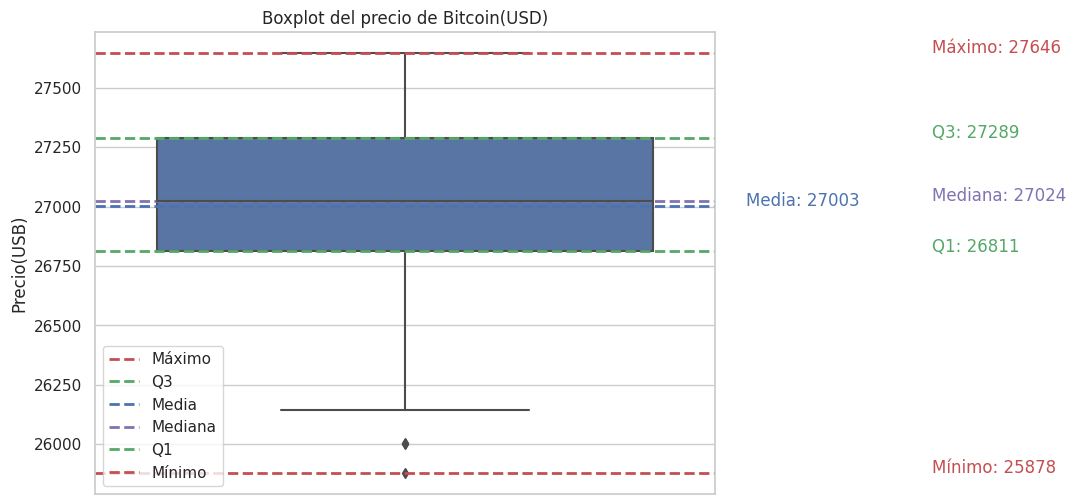

In [307]:
#import matplotlib as plot

close = limpieza_datos()[1]["Close"]
max_value = close.max()
q3_value =close.quantile(0.75)
mean_value = close.mean()
median_value = close.median()
q1_value = close.quantile(0.25)
min_value = close.min()

sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))  
sns.boxplot(y=close, orient='v')


plt.axhline(max_value, color='r', linestyle='--', linewidth=2, label='Máximo')
plt.axhline(q3_value, color='g', linestyle='--', linewidth=2, label='Q3')
plt.axhline(mean_value, color='b', linestyle='--', linewidth=2, label='Media')
plt.axhline(median_value, color='m', linestyle='--', linewidth=2, label='Mediana')
plt.axhline(q1_value, color='g', linestyle='--', linewidth=2, label='Q1')
plt.axhline(min_value, color='r', linestyle='--', linewidth=2, label='Mínimo')


plt.text(0.85, max_value, f'Máximo: {int(max_value)}', color='r')
plt.text(0.85, q3_value, f'Q3: {int(q3_value)}', color='g')
plt.text(0.55, mean_value, f'Media: {int(mean_value)}', color='b')
plt.text(0.85, median_value, f'Mediana: {int(median_value)}', color='m')
plt.text(0.85, q1_value, f'Q1: {int(q1_value)}', color='g')
plt.text(0.85, min_value, f'Mínimo: {int(min_value)}', color='r')


plt.title('Boxplot del precio de Bitcoin(USD)')
plt.ylabel('Precio(USB)')


plt.legend()


plt.show()



> ***Boxplot paso anterior con datos limpios con el filtro***

[*********************100%***********************]  1 of 1 completed


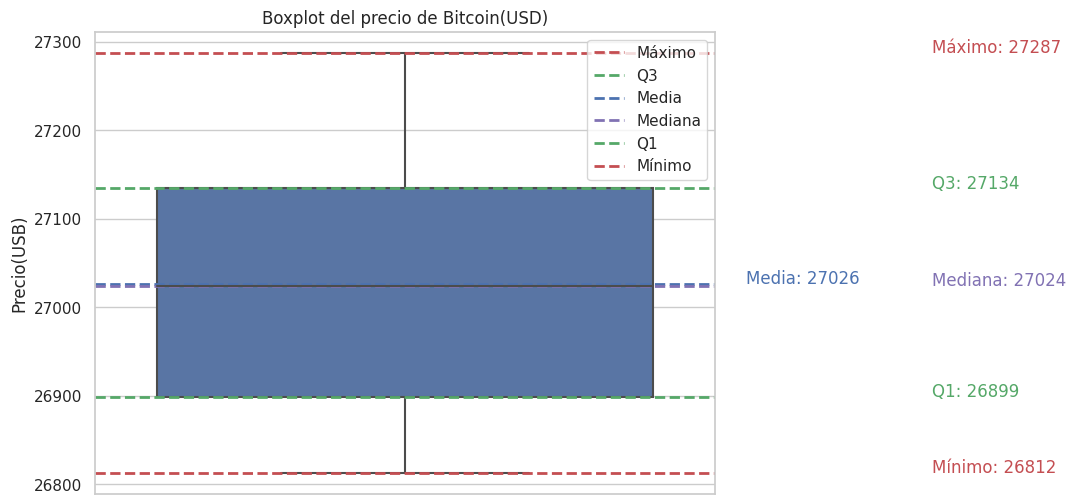

In [308]:
#import matplotlib as plot

close = limpieza_datos()[0]["Close"]
max_value = close.max()
q3_value =close.quantile(0.75)
mean_value = close.mean()
median_value = close.median()
q1_value = close.quantile(0.25)
min_value = close.min()

sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))  
sns.boxplot(y=close, orient='v')


plt.axhline(max_value, color='r', linestyle='--', linewidth=2, label='Máximo')
plt.axhline(q3_value, color='g', linestyle='--', linewidth=2, label='Q3')
plt.axhline(mean_value, color='b', linestyle='--', linewidth=2, label='Media')
plt.axhline(median_value, color='m', linestyle='--', linewidth=2, label='Mediana')
plt.axhline(q1_value, color='g', linestyle='--', linewidth=2, label='Q1')
plt.axhline(min_value, color='r', linestyle='--', linewidth=2, label='Mínimo')


plt.text(0.85, max_value, f'Máximo: {int(max_value)}', color='r')
plt.text(0.85, q3_value, f'Q3: {int(q3_value)}', color='g')
plt.text(0.55, mean_value, f'Media: {int(mean_value)}', color='b')
plt.text(0.85, median_value, f'Mediana: {int(median_value)}', color='m')
plt.text(0.85, q1_value, f'Q1: {int(q1_value)}', color='g')
plt.text(0.85, min_value, f'Mínimo: {int(min_value)}', color='r')


plt.title('Boxplot del precio de Bitcoin(USD)')
plt.ylabel('Precio(USB)')


plt.legend()


plt.show()

### **4. Tomar decisiones**

Crea una funcion **tomar_decisiones**() ✅ , dentro de ella, define nuevamente las variables globales(ver Paso1) ✅ y escribe tu código:

*Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
Si el **precio actual es mayor/igual que el precio promedio** y la tendencia es de baja, entonces guarda el valor **‘Vender’**.✅
Si el **precio actual es menor que el precio promedio** y la tendencia es de alta, entonces guarda el valor **‘Comprar’**.✅
Si **ninguna de las 2 condiciones anteriores se cumple**, entonces guarda el valor *✅

In [309]:
def tomar_decisiones():
    global symbol, period, interval, df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
    precio_actual = extraer_tendencias()[0]
    tendencia=extraer_tendencias()[1]
    media_bitcoin = limpieza_datos()[0]["Close"].mean()
    if precio_actual >= media_bitcoin and tendencia == 'Baja':
        algoritmo_decision = 'Vender'
    elif precio_actual < media_bitcoin and tendencia == 'Alta':
        algoritmo_decision = 'Comprar'
    else:
        algoritmo_decision = 'Esperar'

    print(f"Media = {int(media_bitcoin)} \nDecisión = {algoritmo_decision}\nTendencia = {tendencia}\nPrecio_ahora = {int(precio_actual)}\n\n\nDesicion a automatizar:")
    return algoritmo_decision
tomar_decisiones()

[*********************100%***********************]  1 of 1 completed
Media = 27026 
Decisión = Esperar
Tendencia = Baja
Precio_ahora = 26871


Desicion a automatizar:


'Esperar'

### **5. Visualización**

Crea una funcion **visualizacion()** ✅  , dentro de ella, define nuevamente las variables globales(ver Paso1)✅  y escribe tu código:

Adiciona una nueva columna (Promedio) al dataframe original df_bitcoiny almacena el valor de nuestra variable **media_bitcoin**.✅ 

Configura el tamaño del gráfico en una proporción de **16x5**.✅ 

Adiciona un título al gráfico.✅ 

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin. ✅ 

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin. ✅ 

Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo. ✅ 

Finalmente, usando el método show()  ✅  muestra en pantalla el gráfico que acabamos de configurar.


[*********************100%***********************]  1 of 1 completed
Media = 27026 
Decisión = Esperar
Tendencia = Baja
Precio_ahora = 26871


Desicion a automatizar:


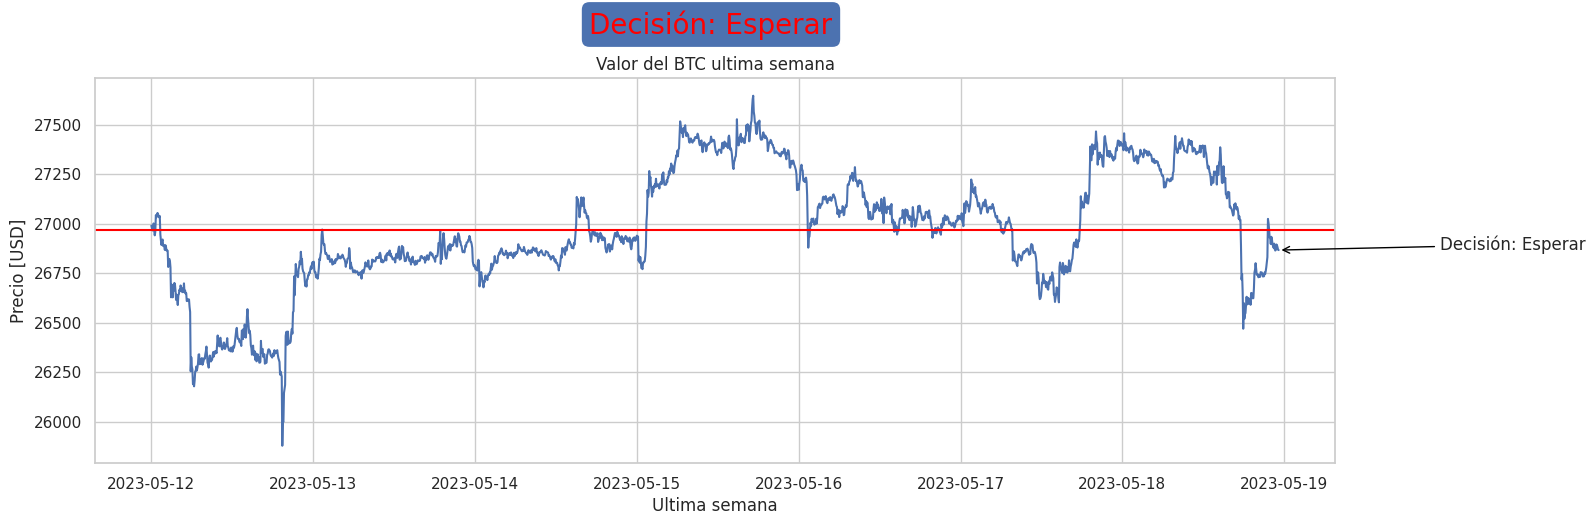

In [310]:
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, df_bitcoin_limpio
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(16, 5))


    sns.lineplot(data=df_bitcoin, x=df_bitcoin.index, y="Close", ax=ax)

    mean_price = df_bitcoin["Close"].mean()
    ax.axhline(mean_price, color="red", linestyle="-") 

    ax.set_xlabel("Ultima semana")
    ax.set_ylabel("Precio [USD]")
    ax.set_title("Valor del BTC ultima semana")

    decision = tomar_decisiones()
    last_data = df_bitcoin.iloc[-1]

    ax.annotate(f"Decisión: {decision}", xy=(last_data.name, last_data['Close']),
            xytext=(last_data.name + pd.Timedelta(days=1), last_data['Close']), xycoords='data',
            arrowprops=dict(arrowstyle='->', color='black'))



    fig.text(0.51, 0.97, f"Decisión: {decision}", ha='center', fontsize=20, color='red',
             bbox=dict(boxstyle='round'))

    plt.show()

visualizacion()


### **6. Automatización**

Importa el método '**clear_output**()'✅ 

Importa también la biblioteca ‘time’ ✅ 

utilizaremos su método time.sleep(300) ✅ 



```
while(True): ✅ 
  clear_output()✅ 
  importar_base_bitcoin()✅ 
  extraer_tendencias()✅ 
  limpieza_datos()✅ 
  tomar_decisiones()✅ 
  visualizacion()✅ 
  time.sleep(300)✅
```




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Media = 27026 
Decisión = Esperar
Tendencia = Baja
Precio_ahora = 26871


Desicion a automatizar:
[*********************100%***********************]  1 of 1 completed
Media = 27026 
Decisión = Esperar
Tendencia = Baja
Precio_ahora = 26871


Desicion a automatizar:


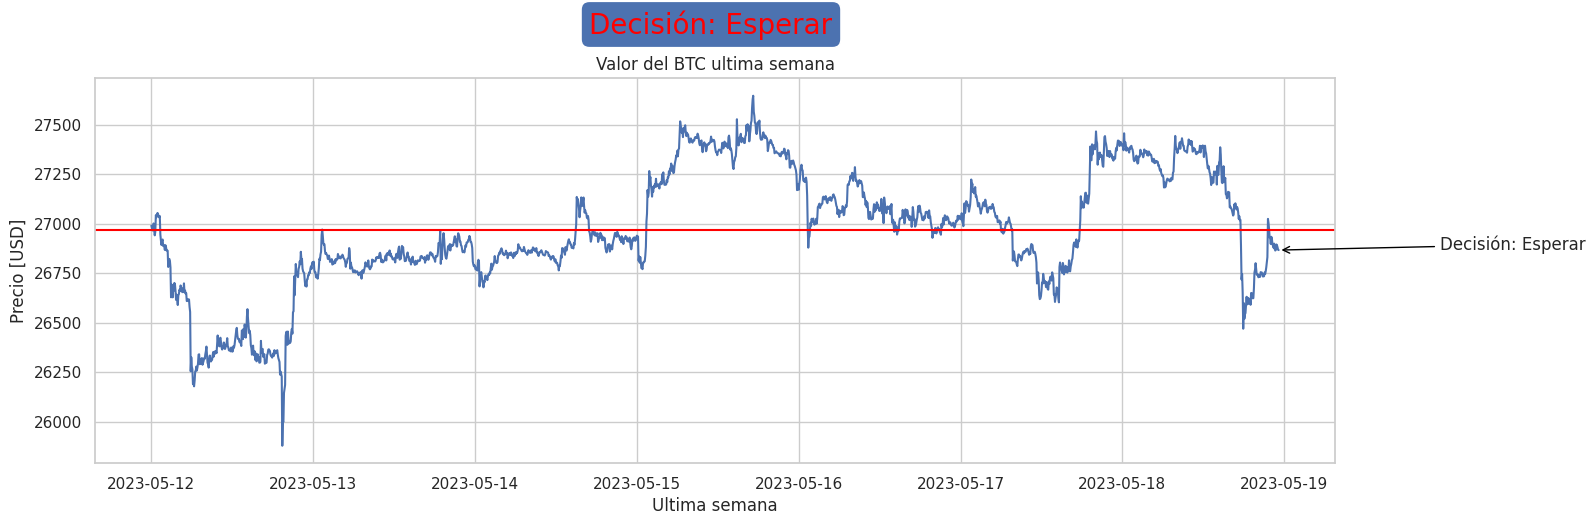

KeyboardInterrupt: ignored

In [311]:
def automatizar():
  while True:
    clear_output()
    importar_base_bitcoin()
    extraer_tendencias()
    limpieza_datos()[0]
    algoritmo_decision = tomar_decisiones()
    visualizacion()
    time.sleep(300)
automatizar()